In [47]:
%matplotlib inline
from modsim import *

begin = State(S = 999, I = 1, R = 0)
begin /= sum(begin) 
    
def make_system(beta, gamma):
    begin = State(S = 999, I = 1, R = 0)
    begin /= sum(begin)
    
    t0 = 0
    t_end = 365
    
    return System(begin = begin, t0 = t0, t_end = t_end, beta = beta, gamma = gamma)

contact = 5
recovery = 14

beta = 1 / contact
gamma = 1 / recovery

system = make_system(beta, gamma)

def update(state, system):
    s, i, r = state
    
    infected = system.beta * i * s
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S = s, I = i, R = r)

state = update(begin, system)

def run_simulation(system, update_func):
    state = system.begin
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        
    return state



In [48]:
run_simulation(system, update)

,value
S,7.040176e-02
I,9.744085e-09
R,9.295982e-01


In [70]:
def add_vaccine(system, fraction):

    system.begin.S -= fraction
    system.begin.R += fraction
    

contact = 5
recovery = 14

beta = 1 / contact
gamma = 1 / recovery

system2 = make_system(beta, gamma)
add_vaccine(system2, 0.4)
#justusedarandomvaccinationratehere
run_simulation(system2, update)

def calc_total_infected(state):
    return state.S[t0] - state.S[t_end]

total_infected = calc_total_infected(system)
total_infected

AttributeError: 'System' object has no attribute 'S'

In [65]:
vaccine_array = linrange(.1, .5, .05)
def sweep_immunity(array):
    sweep = SweepSeries()
    for fraction in array:
        system2 = make_system(beta, gamma)
        add_vaccine(system2, fraction)
        run_simulation(system2, update)
    return sweep

#vaccine_array = linrange(.1, .5, .05)
infected_sweep = sweep_immunity(vaccine_array)
infected_sweep



,value


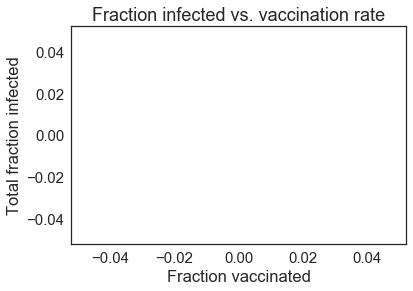

In [62]:
plot(infected_sweep)

decorate(xlabel='Fraction vaccinated',
         ylabel='Total fraction infected',
         title='Fraction infected vs. vaccination rate',
         legend=False)
